In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load Wine Quality RED dataset
df = pd.read_csv("winequality-red.csv", sep=";")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# All columns except 'quality' are features
X = df.drop("quality", axis=1)

# Target variable
y = df["quality"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1599, 11)
Shape of y: (1599,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training and Testing sets prepared.")

Training and Testing sets prepared.


In [6]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [7]:
y_pred = model.predict(X_test)

print("Prediction Completed!")
y_pred[:10]

Prediction Completed!


array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032])

In [8]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R² Score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.39002514396395405
R-squared (R2): 0.4031803412796232


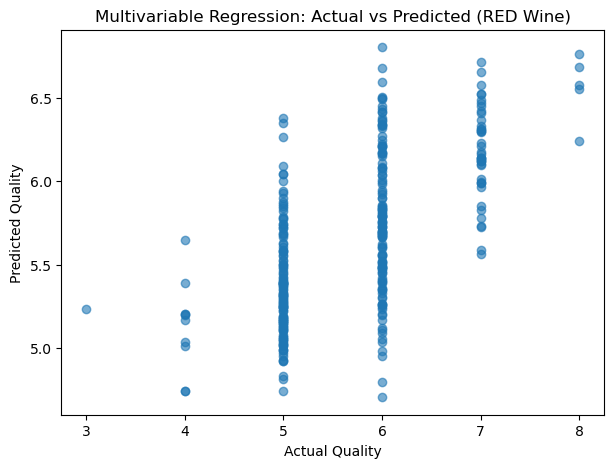

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Multivariable Regression: Actual vs Predicted (RED Wine)")
plt.show()

In [10]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df


,Feature,Coefficient
0,fixed acidity,0.023085
1,volatile acidity,-1.001304
2,citric acid,-0.140821
3,residual sugar,0.006564
4,chlorides,-1.806503
5,free sulfur dioxide,0.005627
6,total sulfur dioxide,-0.003644
7,density,-10.351594
8,pH,-0.393688
9,sulphates,0.841172
